## DSUA-111 Project<br>
Gerald Steven (gs2967)<br>
Data sources:<br>
1. https://data.cityofnewyork.us/Education/2012-AP-Results/9ct9-prf9<br>
2. https://data.cityofnewyork.us/Education/2012-SAT-Results/f9bf-2cp4

## 1: Pre-step

The question I would like to answer in this project is whether a higher percentage of AP exams passed for a particular school will correlate to a higher SAT total average score for the same school. This project will explore the relationship of the two variables by setting an initial hypothesis and fitting a regression model.

## 2: Data

Question 2: I found the dataset from NYC Open Data. The URL for the two datasets are listed at the top of this notebook. I first found the AP results dataset from 2012, which contain the AP results of high schools in New York City. Then, I found the average SAT results from every high school in New York City in 2012. I noticed that both datasets have the same length, which led me to assume that the two datasets contain records of the same high school. With this similarity, I can join the two datasets to have a larger dataset that will contain the AP results and average SAT results of every high school in New York City in 2012.


Each unit of observation in the two datasets is a high school in New York City. The two variables that are relevant would be the average SAT results from every high school (the average critical reading, math, and writing score), and the results of AP tests in every high school. The latter variable shows the number of AP test takers, the number of AP total exams taken, and the number of AP exams passed. Because this dataset does not actually state the AP test result (a score out of 5), we can instead compute the percentage of AP exams that passed for a high school.

Question 3: If there is one thing I would change about this dataset, is that for the AP dataframe specifically, I would include the total number of exams that received a each possible score (1-5). In our case, we are only able to compute the percentage of AP exams that passed (the College Board considers anything above 3 a passing grade). This lack of feature in our dataset is a problem because although anything above a 3 is passing, the quality of work for an exam that receives a 5 is still very different from an exam that receives a 3. If we have this information, we will be able to create dummy variables for our analysis. For instance, if we consider 4 and 5 to be an outstanding grade, we can sum the total number of exams for a school that receives a 4 or a 5. Doing so will distinguish the results from those that receive a 3. If we hypothesize that getting a 4 or a 5 correlates to a higher SAT score, then perhaps we might be able to observe a stronger correlation.

## Load the data

Question 4: Load the two CSV files into a dataframe.

In [1]:
import pandas as pd
import numpy as np
import os
import statsmodels.api as sm

In [3]:
csv_fpath1 = os.path.expanduser('~/project/2012__AP_Results.csv')
ap = pd.read_csv(csv_fpath1)
ap.head(5)

,DBN,SCHOOL NAME,Num of AP Test Takers,Num of AP Total Exams Taken,Num of AP Exams Passed
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,s,s,s
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,37,53,21
2,01M450,EAST SIDE COMMUNITY SCHOOL,12,12,s
3,01M458,FORSYTH SATELLITE ACADEMY,s,s,s
4,01M509,MARTA VALLE HIGH SCHOOL,14,15,s


In [4]:
csv_fpath2 = os.path.expanduser('~/project/2012_SAT_Results.csv')
sat = pd.read_csv(csv_fpath2)
sat.head(5)

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370
3,01M458,FORSYTH SATELLITE ACADEMY,7,414,401,359
4,01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384


## 3: Initial analysis

Question 5: In this section, we will conduct several manipulations of our two datasets. Specifically, we will:
1. Join the two dataframes
2. Replace missing values with np.NaN
3. Drop missing values
4. Convert data types
5. Create new columns
6. Round values to two decimal places

I joined the two dataframes so that it would be easier to conduct our analysis later on. In both dataframes, missing values are encoded as the string "s", which we can replace to the value np.NaN, and then drop those missing values. I learned that out of the 478 records, we are only left with 174 records that do not contain missing values. Then, I converted the data types of certain columns. Most of the numerical columns in the dataset are stored as strings, which we can convert to integers. Last, I created two new columns to help with our analysis later on, and round those values to two decimal places. 

## 3.1 Join the two dataframes

Because the two dataframes share a common column (DBN), we can join these two dataframes on this column. We will use the pd.concat function. We can double check to see if the DBN column in both dataframes match by running the cell below, which returns the length. If sat.DBN == ap.DBN, True (which contains the value 1) will be returned.

In [4]:
len(sat.DBN == ap.DBN)

478

We have confirmed that the length of the cell above is equal to the length of both dataframes.

In [5]:
len(sat), len(ap)

(478, 478)

To make sure that we do not have two columns of 'DBN' and 'SCHOOL NAME', we will delete these columns in one of the dataframes. Then, we will concat.

In [6]:
sat.drop(columns=['DBN','SCHOOL NAME'], inplace=True)
#sat.head()

Now concat.

In [7]:
data = pd.concat([ap,sat], axis = 1)
data.head()

,DBN,SCHOOL NAME,Num of AP Test Takers,Num of AP Total Exams Taken,Num of AP Exams Passed,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,s,s,s,29,355,404,363
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,37,53,21,91,383,423,366
2,01M450,EAST SIDE COMMUNITY SCHOOL,12,12,s,70,377,402,370
3,01M458,FORSYTH SATELLITE ACADEMY,s,s,s,7,414,401,359
4,01M509,MARTA VALLE HIGH SCHOOL,14,15,s,44,390,433,384


## 3.2 Replace missing values

Replace the missing values, encoded as 's' to the value np.nan (NaN) and drop them.

In [8]:
data.replace('s', np.nan,inplace=True)
data.head()

,DBN,SCHOOL NAME,Num of AP Test Takers,Num of AP Total Exams Taken,Num of AP Exams Passed,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,NaN,NaN,NaN,29,355,404,363
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,37,53,21,91,383,423,366
2,01M450,EAST SIDE COMMUNITY SCHOOL,12,12,NaN,70,377,402,370
3,01M458,FORSYTH SATELLITE ACADEMY,NaN,NaN,NaN,7,414,401,359
4,01M509,MARTA VALLE HIGH SCHOOL,14,15,NaN,44,390,433,384


The cell below checks for any NaN values. Because the cell returns True, we can confirm that there are in fact missing values. For the purpose of our analysis, we will delete these records.

In [9]:
data.isnull().values.any()

True

## 3.3 Drop missing values

To actually drop these missing values, we will use the .dropna() function. After removing these missing values, we are left with 174 observation.

In [10]:
data.dropna(axis = 0, how = "any", inplace = True)
len(data)

174

In [11]:
data.head()

,DBN,SCHOOL NAME,Num of AP Test Takers,Num of AP Total Exams Taken,Num of AP Exams Passed,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,37,53,21,91,383,423,366
5,01M515,LOWER EAST SIDE PREPARATORY HIGH SCHOOL,50,60,54,112,332,557,316
6,01M539,"NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...",306,587,323,159,522,574,525
14,02M300,URBAN ASSEMBLY SCHOOL OF DESIGN AND CONSTRUCTI...,135,135,8,48,404,449,416
16,02M305,"URBAN ASSEMBLY ACADEMY OF GOVERNMENT AND LAW, THE",31,40,20,50,375,388,385


## 3.4 Convert data types

Before we create new columns, we first need to ensure that the numerical columns have the correct data type: integers. When we run the cell below, we find that the values stored in these columns are strings.

In [12]:
type(data['Num of AP Test Takers'][1])

str

We can convert the data type to integers by running the cell below.

In [13]:
#for the AP columns
data['Num of AP Test Takers'] = data['Num of AP Test Takers'].astype(int)
data['Num of AP Total Exams Taken'] = data['Num of AP Total Exams Taken'].astype(int)
data['Num of AP Exams Passed'] = data['Num of AP Exams Passed'].astype(int)

#for the SAT columns
data['Num of SAT Test Takers'] = data['Num of SAT Test Takers'].astype(int)
data['SAT Critical Reading Avg. Score'] = data['SAT Critical Reading Avg. Score'].astype(int)
data['SAT Math Avg. Score'] = data['SAT Math Avg. Score'].astype(int)
data['SAT Writing Avg. Score'] = data['SAT Writing Avg. Score'].astype(int)

Double check the data type, and indeed they are now integers.

In [14]:
type(data['Num of AP Test Takers'][1])

numpy.int64

## 3.5 Create new columns

To help with our analysis, we will create two new columns in our dataframe.

1. Create a column that counts the percentage of AP exams passed for every school.
2. Create a column that sums the SAT total average score for every school.

To count the percentage of AP exams passed in every school, we can divide 'Num of AP exams Passed' with 'Num of AP Total Exams Taken' multiplied by 100. This result will give us a percentage.

To count the SAT total average score for every school, we can simply sum the columns: SAT Critical Reading Avg. Score, SAT Math Avg. Score, and SAT Writing Avg. Score, which will give us a score out of a possible score of 2400 (the old SAT scoring system).

In [15]:
#for the percentage of AP exams passed
data['Percentage of AP Exams Passed'] = (data['Num of AP Exams Passed'] / data['Num of AP Total Exams Taken']) * 100

#for the total SAT average score
data['SAT Total Avg. Score'] = data['SAT Critical Reading Avg. Score']+data['SAT Math Avg. Score']+data['SAT Writing Avg. Score']

#check
data.head()

,DBN,SCHOOL NAME,Num of AP Test Takers,Num of AP Total Exams Taken,Num of AP Exams Passed,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,Percentage of AP Exams Passed,SAT Total Avg. Score
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,37,53,21,91,383,423,366,39.622642,1172
5,01M515,LOWER EAST SIDE PREPARATORY HIGH SCHOOL,50,60,54,112,332,557,316,90.000000,1205
6,01M539,"NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...",306,587,323,159,522,574,525,55.025554,1621
14,02M300,URBAN ASSEMBLY SCHOOL OF DESIGN AND CONSTRUCTI...,135,135,8,48,404,449,416,5.925926,1269
16,02M305,"URBAN ASSEMBLY ACADEMY OF GOVERNMENT AND LAW, THE",31,40,20,50,375,388,385,50.000000,1148


## 3.6 Round values to two decimal places

Because values in the column 'Percentage of AP Exams Passed' are stored as floats, we can round to two decimal places.

In [16]:
data['Percentage of AP Exams Passed'] = data['Percentage of AP Exams Passed'].round(decimals=2)
data.head()

,DBN,SCHOOL NAME,Num of AP Test Takers,Num of AP Total Exams Taken,Num of AP Exams Passed,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,Percentage of AP Exams Passed,SAT Total Avg. Score
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,37,53,21,91,383,423,366,39.62,1172
5,01M515,LOWER EAST SIDE PREPARATORY HIGH SCHOOL,50,60,54,112,332,557,316,90.00,1205
6,01M539,"NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...",306,587,323,159,522,574,525,55.03,1621
14,02M300,URBAN ASSEMBLY SCHOOL OF DESIGN AND CONSTRUCTI...,135,135,8,48,404,449,416,5.93,1269
16,02M305,"URBAN ASSEMBLY ACADEMY OF GOVERNMENT AND LAW, THE",31,40,20,50,375,388,385,50.00,1148


## Data visualization

In [17]:
#import packages
import matplotlib.pyplot as plt
import seaborn as sns

## Scatter plot

The first visualization I made is a scatterplot. I generated this scatterplot because I wanted to see if there was any correlation between the percentage of AP exams passed and SAT total average score. Each point in the scatter plot represents one record in our dataset. I chose a scatter plot because it is the most appropriate graph to visualize relationships between the two variables. 

From this scatter plot, I learned that there is somewhat a correlation between percentage of AP exams passed and SAT total average score. For instance, there does not seem to be much correlation for schools with a low percentage of AP exams passed. But for schools where they had a high percentage of AP exams passed (the right half of the scatter plot), they also have a high SAT total average score. Although this scatter plot does not actually provide us with the actual correlation (r value), this scatter plot confirms that these two variables are worth exploring. 

Text(0.5, 1.0, 'Scatter plot of percentage of AP exams passed and average total SAT score')

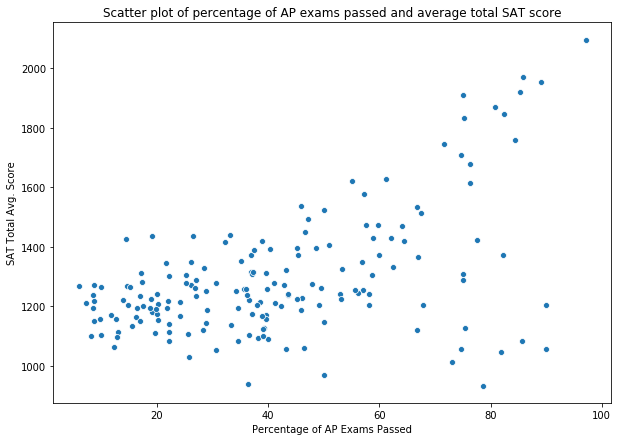

In [18]:
plt.figure(figsize=(10,7))
ax1 = sns.scatterplot(x=data['Percentage of AP Exams Passed'], y=data['SAT Total Avg. Score'])
#ax1.set_xlabel("Percentage of AP Exams Passed")
#ax1.set_ylabel("SAT Total Avg. Score")
ax1.set_title("Scatter plot of percentage of AP exams passed and average total SAT score")

## Distribution plot

The second visualization I made is a distribution plot of SAT total average score. I chose a distribution plot because I wanted to see if the distribution would be normally distributed with most of the values centered around the mean. The distribution plot below confirms that SAT total average scores follow a normal distribution, with a mean centered slightly above 1200. This information is helpful because I can conlude that only a small fraction of schools have high SAT total average scores (represented on the right tail of the distribution plot). This result is also comparable to the distribution of grades for any college class, where the grades are curved. 

Text(0.5, 1.0, 'Distribution plot of SAT total average score')

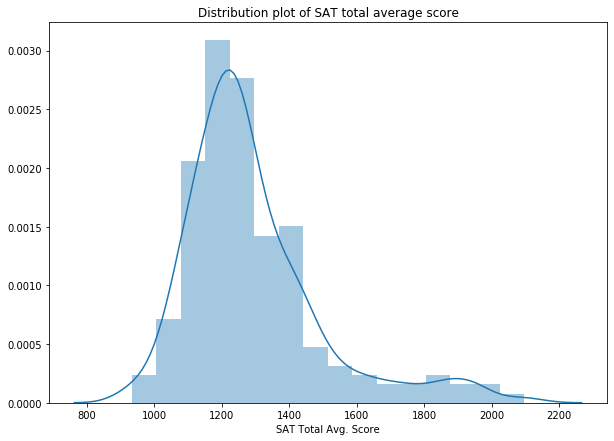

In [19]:
plt.figure(figsize=(10,7))
ax2 = sns.distplot(data['SAT Total Avg. Score'])
ax2.set_title("Distribution plot of SAT total average score")

## 4: Hypothesis formation

Question 7: The dependent variable in this dataset is SAT total average score for a school, and the independent variable is the percentage of AP exams passed in a school. In this dataset, the SAT scores are measured out of a highest possible score of 2400, and the passed AP exams are stored as a percentage.

Question 8: To calculate the correlation coefficient, we will need to transform our variables to standard units. I decided to convert to standard units because the SAT scores are stored as values out of 2400, and the AP exams are stored as a percentage of those exams that passed. We can convert to standard units by running the cell below. 

In [20]:
def transform_to_standard_units(array):
    return (array - np.mean(array)) / np.std(array)

ap_standard_units = transform_to_standard_units(data["SAT Total Avg. Score"])
sat_standard_units = transform_to_standard_units(data["Percentage of AP Exams Passed"])

Store results in a dataframe called standard_data.

In [21]:
standard_data = pd.DataFrame(data = { "AP" : ap_standard_units, "SAT" : sat_standard_units})
standard_data.head()

,AP,SAT
1,-0.584181,-0.072688
5,-0.422268,2.190880
6,1.618829,0.619681
14,-0.108253,-1.586377
16,-0.701937,0.393684


## Calculating the correlation

To calculate the correlation (r), we can multiple the AP column and the SAT column and take the mean.

In [22]:
r = np.mean(standard_data['AP'] * standard_data['SAT'])
r

0.5057605774444344

We can interpret the correlation as being moderate and positive. The correlation is moderate because r takes the value of 0.5. The correlation is also positive because the value is a positive integer, meaning that a higher percentage of AP exams passed would correlate positively with a higher SAT total average score. We can conclude that there is a positive relationship between the percentage of AP exams passed and SAT total average score.

## Writing the regression model

Question 9: The regression model is a simple line equation of $y = mx + b$

The thing we are predicting $y$ is the predicted SAT total average score. Our intercept term is $b$, and to predict $y$, we use $x$, which is the percentage of AP exams passed. $m$ in this case is just the slope.

Therefore, we can write our regression model as below:<br>
$Total\_SAT\_average\_score_i = \alpha + \beta*percentage\_of\_AP\_exams\_passed_i + e_i$ <br>
where $\alpha$ is our intercept, $\beta$ is our slope, and $e_i$ is our residual term.

We can predict our intercept and slope by fitting a regression model.

In [23]:
x = data["Percentage of AP Exams Passed"] #independent variable
y = data["SAT Total Avg. Score"] #dependent variable

X = sm.add_constant(x) #adding an intercept to the indepedent variable
model = sm.OLS(y,X, missing = 'drop') #fitting the model
results = model.fit() 
print(results.params)

const                            1100.075291
Percentage of AP Exams Passed       4.631378
dtype: float64


/opt/conda/envs/dsua-111/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


From the celll above, we find that the intercept in our regression model is 1100.075 and out slope is 4.63. We can confirm our slope and intercept using simple mathematics below. 

In [24]:
SAT_mean = np.mean(data["SAT Total Avg. Score"])
AP_mean = np.mean(data["Percentage of AP Exams Passed"])


SAT_std = np.std(data["SAT Total Avg. Score"])
AP_std = np.std(data["Percentage of AP Exams Passed"])

slope = (r * SAT_std) / AP_std
intercept = SAT_mean - slope * AP_mean

print("Slope:", slope, "\n", "Intercept:", intercept)

Slope: 4.631378307719665 
 Intercept: 1100.0752914847958


Using both methods yield the same results.

## The null and alternative hypotheses.

Question 10: Now we can write our null and alternative hypothesis.

Null hypothesis: a higher percentage of passed AP exams is not associated with a higher total average SAT score. <br>
Alternative hypthesis: a higher percentage of passed AP exams is associated with a higher total average SAT score.

## 5: Regression analysis

Question 11: Since we have our slope and intercept, we can estimate a regression output. The mean percentage of AP exams passed is 41.24. With this value, we will estimate the SAT total average score. We can do so using the simple regression equation. 

In [25]:
intercept2 = results.params[0]
slope2 = results.params[1]

print(intercept,slope)

1100.0752914847958 4.631378307719665


In [26]:
#the mean percentage of AP exams passed (stored in variable AP_mean) is 41.24
#estimate regression equation with value of 41

estimate_41 = intercept2 + slope2 * 41.24
estimate_41

1291.0733328951553

Our regression output when the input is 41.24 is 1291. This output means that if a school happens to have 41.24% of its AP exams passed, then we can estimate that for that same school, its SAT total average score is 1291. 

## Interpreting the coefficient, p-value, and confidence interval, and the R^2

Question 12: We can estimate our coefficient, p-value, and confidence interval by using the .summary() and .corr() function. Using our model, which is stored in 'results', we can compute results.summary() below.

In [35]:
standard_data.corr()

,AP,SAT
AP,1.000000,0.505761
SAT,0.505761,1.000000


In [27]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     SAT Total Avg. Score   R-squared:                       0.256
Model:                              OLS   Adj. R-squared:                  0.251
Method:                   Least Squares   F-statistic:                     59.12
Date:                  Wed, 06 May 2020   Prob (F-statistic):           1.09e-12
Time:                          18:48:50   Log-Likelihood:                -1146.4
No. Observations:                   174   AIC:                             2297.
Df Residuals:                       172   BIC:                             2303.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                          1100.0753     28.226     38.973      0.000    1044.360    1155.790
Percentage of AP Exams Passed     4.6314      0.602      7.689      0.000       3.442       5.820
==============================================================================
Omnibus:                        6.613   Durbin-Watson:                   1.685
Prob(Omnibus):                  0.037   Jarque-Bera (JB):               10.602
Skew:                           0.095   Prob(JB):                      0.00499
Kurtosis:                       4.194   Cond. No.                         98.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We have our results.

coefficient: 0.506 <br>
p-value: 0.00 <br>
95% confidence interval: [3.442, 5.820] <br>
$R^2$ = 0.256

The correlation coefficient is 0.506. This coefficient implies that we have a positive and moderate correlation between percentage of AP exams passed and SAT total average score.

The p-value we obtained is 0. With an alpha level of $\alpha = 0.05$, we will reject the null hypothesis that a higher percentage of passed AP exams is not associated with a higher total average SAT score. Instead, we will fail to reject our alternative hypothesis that a higher percentage of passed AP exams is associated with a higher total average SAT score.

The 95% confidence interval we obtained is [3.442, 5.820]. We can also use the confidence interval we obtain to reject the null hypothesis. Because our null hypothesis assumes that there is no difference, we will only fail to reject the null hypothesis if our confidence interval includes 0. But the confidence interval we obtained does not include 0, so we will fail to reject the null hypothesis.

The $R^2$ value is 0.256. Our $R^2$ value explains the variation of percentage of AP exams passed and total SAT average score. Our value of 0.256 is relatively low, and implies that only 25% of the variation in total SAT average score is explained by percentage of AP exams passed. The rest of the 75% of variation is explained by other things that we do not have in our data.

We can also manually compute our $R^2$ value.

In [28]:
#we want to predict average total SAT scores
observed = data['SAT Total Avg. Score'] #observed values of average total SAT scores
predicted = intercept + slope * data["Percentage of AP Exams Passed"]

print("Mean of observed {}".format(np.mean(observed)))
print("Mean of predicted {}".format(np.mean(predicted)))
print("Variance of observed {}".format(np.std(observed)**2))
print("Variance of predicted {}".format(np.std(predicted)**2))

#variance of predicted = r**2 variance of observed
r**2 * np.std(observed)**2

formula = 1 - (np.std(predicted - observed)**2 / np.std(observed)**2)

print()
print("Value of r^2 {}".format(r**2))
print("Value of Formula {}".format(formula))

Mean of observed 1291.0632183908046
Mean of predicted 1291.0632183908046
Variance of observed 41539.34657814771
Variance of predicted 10625.505719656803

Value of r^2 0.2557937616969277
Value of Formula 0.2557937616969279


Manually computing our $R^2$ yields a similar result: 0.256 since results.summary() also returned 0.256.

## Which hypothesis to reject and fail to reject, and why?

Question 13: We reject our null hypothesis that a higer percentage of passed AP exams is not associated with a higher total average SAT score. We have demonstrated that we reject our null because our p-value is less than 0.05 and our confidence interval does not include 0. Therefore, we will fail to reject our alternative hypothesis that a higher percentage of passed AP exams is associated with a higher total average SAT score.

## Generating the residual plot

Question 14: We can plot our residuals using the cell below.

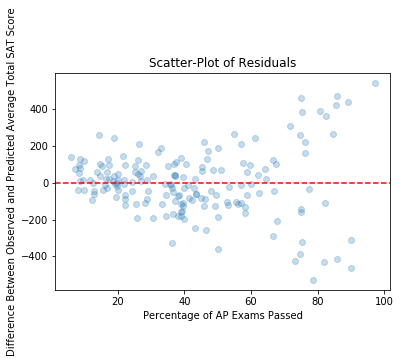

In [29]:
plt.scatter(data["Percentage of AP Exams Passed"], observed - predicted, alpha = 0.25)

plt.axhline(y=0, color = "red", linestyle ="dashed")

plt.xlabel("Percentage of AP Exams Passed")
plt.ylabel("Difference Between Observed and Predicted Average Total SAT Score")
plt.title("Scatter-Plot of Residuals");

## Comment on heteroskedasticity

From our residual plot, we can observe hetereoskedasticity, meaning that the variance of our errors changes over the data. It would be ideal for us to not have any pattern in the residual, in which case we would observe homoskedasticity. But we do see a pattern in our case as the percentage of AP exams passed is greater, the variance also increases. For instance, the variance of residuals for schools that passed 20% of its AP exams is much lower than the variance of residuals for schools that passed 80% of its AP exams. 

Heteroskedasticity implies that our regression model is not able to consistently predict SAT total average score (our dependent variable) across all values. In our case, our regression model is consistently accurate when it predicts low values of SAT total average score, but inconsistent when it predicts high values of SAT total average score.

## 6: Conclusions

## Sources of bias

Question 15: There are two sources of bias in our analysis: selection bias and confounding bias. Selection bias may occur because our data might not contain records for all high schools in New York City. For instance, a high school that does poorly on AP exams and SAT exams might not want to report their results, in which case we would not have their record in our dataset. Although it is difficult to confirm if schools would actually do this, we did have missing values in our dataset. Selection bias can also occur because we dropped all records with missing values. Consequently, we were left with a smaller pool of high schools to conduct our analysis, and our sample of 174 observations is not representative of our entire population of 478 high schools. 

Confounding bias could also be present in our data because we did not take into account for all relevant factors when conducting our analysis. Our dataframe contains information on a school's SAT and AP results, but does not provide further information about the school itself, such as student demographics, school location, or school funding. Failing to adjust for confounders imply that it is difficult for us to accurately predict a school's SAT total average score only with the percentage of their AP exams passed.

## Conclusions from our analysis

Question 16: We can conclude that there is an association between the percentage of AP exams passed for a school and its SAT total average score. Our findings reveal that we reject the null hypothesis of on difference or no association. Although we obtained a positively moderate correlation of 0.5, we should also point out that we observed heteroskedasticity in our regression model, meaning that we made mistakes in our modeling. 

It is also important to remember that while we identified correlation, we did not identify causation. Correlation does not imply causation, and so we cannot definitely claim that a higher percentage of AP exams passed for a high school causes a higher SAT total average score. We would need to create further assumptions about our study and run more analyses in order to identify a causal effect.

## Limitations and weaknesses

Question 17: One limitation of our analysis is that we omitted a large amount of observations with missing values. Before we removed missing values, we had 478 observations, but after removing them, we were left 174 observations. The number of observations we were left with is not even half of our initial number of observations. This feature is a limitation because although we can conclude that a higher percentage of AP exams passed is associated with a higher SAT total average score, we cannot conclude that this correlation would be true for all high schools in New York City. 174 observations is not a great sample for the entire population of 478 high schools in New York. We cannot assume that if a high school in New York City happens to have a high percentage of AP exams passed, it is guaranteed that the same high school would have a high SAT total average score.

We also need to be aware of potential confounders. There are a lot of factors that can affect a high school's SAT total average score: the size of the school, teacher-to-student ratio, the school's resources, and whether the school is private of public. In our project, we only used the percentage of AP exams passed of a school to predict their SAT total average score. Because of confounders, it is likely that a school with a low percentage of AP exams passed can have a high SAT total average score. The opposite is also true, where a high school with a high percentage of AP exams passed can have a low SAT total average score.